# **SELLING PRICE PREDICTION OF OLD VEHICLES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("car_prediction_dataset.csv")

In [3]:
dataset.shape

(301, 9)

In [4]:
dataset.head(2)

,car_name,year,present_price,kms_driven,fuel_type,seller_type,transmission,owner,selling_price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75


In [5]:
dataset.isnull().sum()

car_name         0
year             0
present_price    0
kms_driven       0
fuel_type        0
seller_type      0
transmission     0
owner            0
selling_price    0
dtype: int64

In [6]:
dataset.duplicated().sum()

np.int64(2)

In [7]:
dataset.drop_duplicates()

,car_name,year,present_price,kms_driven,fuel_type,seller_type,transmission,owner,selling_price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60
...,...,...,...,...,...,...,...,...,...
296,city,2016,11.60,33988,Diesel,Dealer,Manual,0,9.50
297,brio,2015,5.90,60000,Petrol,Dealer,Manual,0,4.00
298,city,2009,11.00,87934,Petrol,Dealer,Manual,0,3.35
299,city,2017,12.50,9000,Diesel,Dealer,Manual,0,11.50


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       301 non-null    object 
 1   year           301 non-null    int64  
 2   present_price  301 non-null    float64
 3   kms_driven     301 non-null    int64  
 4   fuel_type      301 non-null    object 
 5   seller_type    301 non-null    object 
 6   transmission   301 non-null    object 
 7   owner          301 non-null    int64  
 8   selling_price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
dataset.describe()

,year,present_price,kms_driven,owner,selling_price
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,7.628472,36947.205980,0.043189,4.661296
std,2.891554,8.644115,38886.883882,0.247915,5.082812
min,2003.000000,0.320000,500.000000,0.000000,0.100000
25%,2012.000000,1.200000,15000.000000,0.000000,0.900000
50%,2014.000000,6.400000,32000.000000,0.000000,3.600000
75%,2016.000000,9.900000,48767.000000,0.000000,6.000000
max,2018.000000,92.600000,500000.000000,3.000000,35.000000


### **LABEL ENCODING**

In [10]:
from sklearn.preprocessing import LabelEncoder

##### **CAR NAME ENCODING**

In [11]:
car_name_le=LabelEncoder()
dataset['car_name']=car_name_le.fit_transform(dataset['car_name'])

##### **FUEL TYPE ENCODING**

In [12]:
dataset['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [13]:
fuel_type_le=LabelEncoder()
dataset['fuel_type']=fuel_type_le.fit_transform(dataset['fuel_type'])

##### **SELLER TYPE ENCODING**

In [14]:
seller_type_le=LabelEncoder()
dataset['seller_type']=fuel_type_le.fit_transform(dataset['seller_type'])

##### **TRANSMISSION ENCODING**

In [15]:
transmission_le=LabelEncoder()
dataset['transmission']=fuel_type_le.fit_transform(dataset['transmission'])

### **VISUALISING THE DATA**

In [16]:
dataset.head(3)

,car_name,year,present_price,kms_driven,fuel_type,seller_type,transmission,owner,selling_price
0,90,2014,5.59,27000,2,0,1,0,3.35
1,93,2013,9.54,43000,1,0,1,0,4.75
2,68,2017,9.85,6900,2,0,1,0,7.25


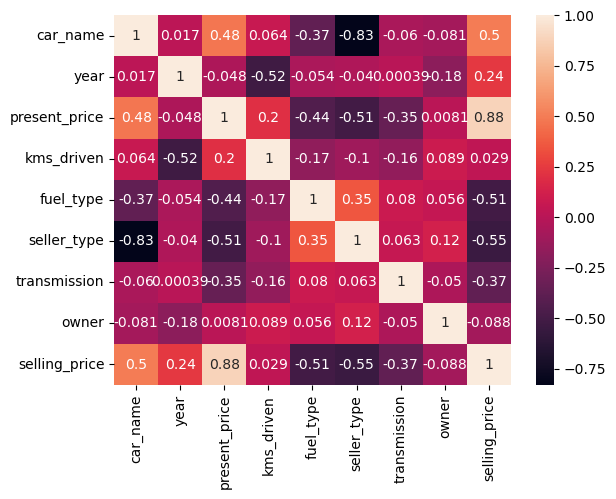

In [17]:
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [18]:
input_data=dataset.iloc[:,:-1]
output_data=dataset['selling_price']

### **SCALING DATA TO REMOVE ANAMOLY**

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
ss=StandardScaler()
input_data=pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)

In [21]:
dataset.head(3)

,car_name,year,present_price,kms_driven,fuel_type,seller_type,transmission,owner,selling_price
0,90,2014,5.59,27000,2,0,1,0,3.35
1,93,2013,9.54,43000,1,0,1,0,4.75
2,68,2017,9.85,6900,2,0,1,0,7.25


### **SPLITTING DATA**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.2,random_state=42)

### **MODEL SELECTION**

In [24]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [25]:
 from sklearn.metrics import mean_squared_error,mean_absolute_error

In [26]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100, lr.score(x_test,y_test)*100

(88.40630578239454, 84.65539666857805)

In [27]:
mean_squared_error(y_test,lr.predict(x_test)),mean_absolute_error(y_test,lr.predict(x_test))

(3.5347190697129753, 1.2142339415047014)

In [28]:
lr1=Lasso(alpha=0.5)
lr1.fit(x_train,y_train)
lr1.score(x_train,y_train)*100, lr1.score(x_test,y_test)*100

(85.0124395411389, 78.63348352385346)

In [29]:
mean_squared_error(y_test,lr1.predict(x_test)),mean_absolute_error(y_test,lr1.predict(x_test))

(4.921901961904479, 1.4658722139390727)

In [30]:
lr2=Ridge(alpha=10)
lr2.fit(x_train,y_train)
lr2.score(x_train,y_train)*100, lr2.score(x_test,y_test)*100

(88.28628537091497, 84.16213595432284)

In [31]:
mean_squared_error(y_test,lr2.predict(x_test)),mean_absolute_error(y_test,lr2.predict(x_test))

(3.6483445584506238, 1.233161689725921)

In [32]:
lr3=ElasticNet(alpha=0.5)
lr3.fit(x_train,y_train)
lr3.score(x_train,y_train)*100, lr3.score(x_test,y_test)*100

(84.00059239671332, 78.3177718663528)

In [33]:
mean_squared_error(y_test,lr3.predict(x_test)),mean_absolute_error(y_test,lr3.predict(x_test))

(4.99462798760845, 1.4094819518715052)

In [34]:
dt=DecisionTreeRegressor(max_depth=15)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

(100.0, 94.52366873121181)

In [35]:
mean_squared_error(y_test,dt.predict(x_test)),mean_absolute_error(y_test,dt.predict(x_test))

(1.2615049180327873, 0.6940983606557376)

In [36]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)*100, rf.score(x_test,y_test)*100

(98.33237614607282, 96.59775818440349)

In [37]:
mean_squared_error(y_test,rf.predict(x_test)),mean_absolute_error(y_test,rf.predict(x_test))

(0.7837262890163934, 0.5828016393442627)

In [38]:
sv=SVR()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100, sv.score(x_test,y_test)*100

(66.00840380338376, 78.48466914602926)

In [39]:
mean_squared_error(y_test,sv.predict(x_test)),mean_absolute_error(y_test,sv.predict(x_test))

(4.956182223686514, 0.9945642205689335)

In [40]:
knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)*100, knn.score(x_test,y_test)*100

(86.59124637342433, 90.59004346126326)

In [41]:
mean_squared_error(y_test,knn.predict(x_test)),mean_absolute_error(y_test,knn.predict(x_test))

(2.1676384918032783, 0.9017704918032786)

In [42]:
## now its clear that random forest is the best suitable model with good accuracy and low error

In [43]:
x_test #taking a test data to predict

,car_name,year,present_price,kms_driven,fuel_type,seller_type,transmission,owner
177,-1.275759,0.821718,-0.817924,-0.333500,0.500183,1.356327,-2.554408,-0.174501
289,0.251795,0.821718,0.691970,-0.668875,0.500183,-0.737285,0.391480,-0.174501
228,1.230996,-0.563924,0.205282,0.593804,-1.852241,-0.737285,0.391480,-0.174501
198,-2.059120,-0.910335,-0.817924,-0.050157,0.500183,1.356327,0.391480,3.865859
60,0.330131,-0.217514,1.272521,0.078661,0.500183,-0.737285,0.391480,-0.174501
...,...,...,...,...,...,...,...,...
234,0.760979,0.475308,-0.223468,-0.835995,0.500183,-0.737285,0.391480,-0.174501
296,0.251795,0.821718,0.460214,-0.076225,-1.852241,-0.737285,0.391480,-0.174501
281,0.251795,-2.642389,-0.003299,0.347965,0.500183,-0.737285,0.391480,-0.174501
285,0.956819,0.821718,0.100991,-0.563806,0.500183,-0.737285,-2.554408,-0.174501


In [44]:
rf.predict([[-1.275759,0.821718,-0.817924,-0.333500,0.500183,1.356327,-2.554408,-0.174501]])

C:\Users\Aryansh Pathak\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.4365])

In [45]:
y_test #comparing the predicted data and test data

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: selling_price, Length: 61, dtype: float64

In [46]:
# let's do a prediction for this dataset the original output is 3.35
#	car_name	year	present_price	kms_driven	fuel_type	seller_type	transmission	owner	selling_price
# 	 ritz	    2014	    5.59	       27000	  Petrol	   Dealer	   Manual	      0	

In [47]:
new_data=pd.DataFrame([['ritz',2014,5.59,27000,'Petrol','Dealer','Manual',0]],columns=x_train.columns)

In [48]:
new_data

,car_name,year,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0


In [49]:
new_data['car_name']=car_name_le.fit_transform(new_data['car_name'])

In [50]:
new_data['fuel_type']=fuel_type_le.fit_transform(new_data['fuel_type'])

In [51]:
new_data['seller_type']=seller_type_le.fit_transform(new_data['seller_type'])

In [52]:
new_data['transmission']=transmission_le.fit_transform(new_data['transmission'])

In [53]:
new_data=pd.DataFrame(ss.transform(new_data),columns=new_data.columns)

In [54]:
new_data

,car_name,year,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,-2.4508,0.128897,-0.236215,-0.256224,-4.204665,-0.737285,-2.554408,-0.174501


In [55]:
rf.predict(new_data)

array([3.3675])

In [57]:
# our predicted value is 3.3675

# **Thank you !**